# 0. Get Started

In [92]:
# Standard Pandas & Numpy
import pandas as pd
import numpy as np
# Standard Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [2]:
df = pd.read_csv('heart.csv', low_memory=False)

# Exploring the Dataset

In [151]:
#To get the first 5 rows of the dataset
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [4]:
#To get the last 5 rows in the dataset
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
# To know the number of rows and columns in my data
df.shape

(918, 12)

In [6]:
# To get some information that helps us to understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# To get a description about the data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# Dataset Cleaning

In [9]:
#Check for any missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

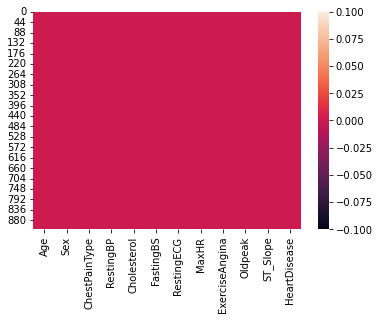

In [10]:
# Another way to visualize any missing values in our dataset
sns.heatmap(df.isnull())

* No missing values in the dataset!

In [13]:
#Check for any duplicated values in our dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [14]:
# To get the sum of any duplicated values in our dataset
df.duplicated().sum()

0

* No duplicated values in the dataset!

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba453a5730>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba453a5fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba453aefd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba453c91f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba453c9670>],
 'means': []}

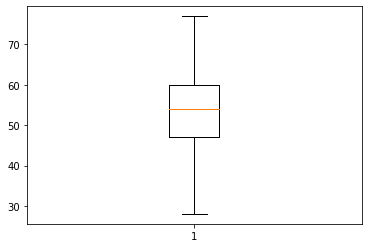

In [57]:
# Check for any outliers in the age variable
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba45249b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba4524c7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba45249b20>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba4524c3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba4524c100>],
 'means': []}

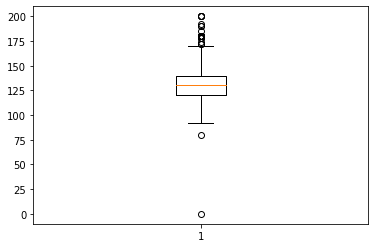

In [58]:
# Check for any outliers in the RestingBP variable
plt.boxplot(df['RestingBP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba4437f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba43eec2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba4437f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba43eec910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba43eecc40>],
 'means': []}

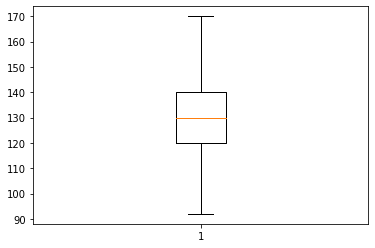

In [59]:
# Removing the outliers in the RestingBP variable using interquartile range (IQR)
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['RestingBP'] >= Q1 - 1.5 * IQR) & (df['RestingBP'] <= Q3 + 1.5 * IQR)]
# Now, there is no outliers in the RestingBP variable
plt.boxplot(df['RestingBP'])

* No more outliers

# Plotting Dataset

Scatter Plot:
Visualize the relationship between two variables.

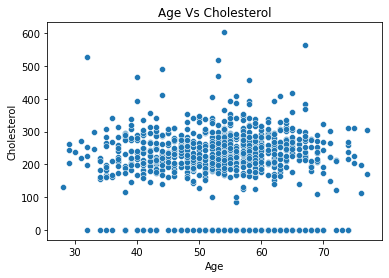

In [16]:
sns.scatterplot(x= 'Age', y= 'Cholesterol', data= df)
plt.title('Age Vs Cholesterol')
plt.show()

# Heat Map
Visualize the correlation between multiple variables

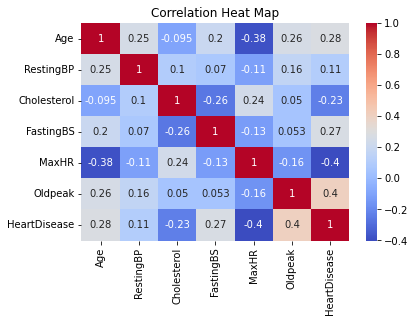

In [18]:
#??? More definition is required
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

<AxesSubplot:>

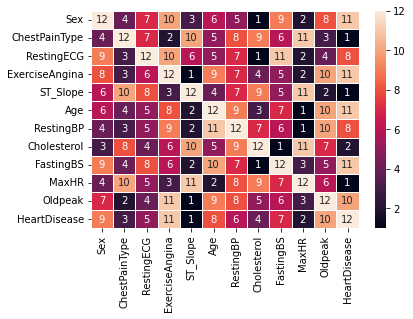

In [56]:
#??? More definition is required
cor = df.corr()
sns.heatmap(cor.rank(axis='columns'), annot=True, linewidth=1)

# Bar Plot
Visualize the frequency of a categorical variable.

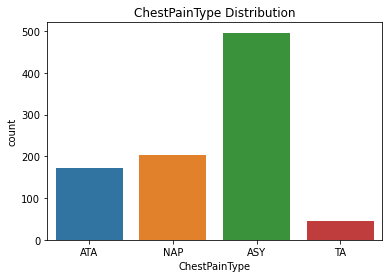

In [19]:
sns.countplot(x='ChestPainType', data=df)
plt.title('ChestPainType Distribution')
plt.show()

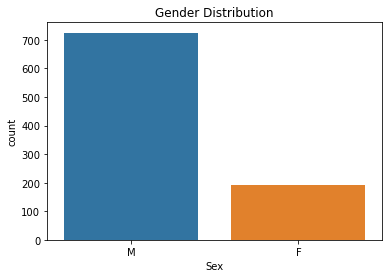

In [20]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

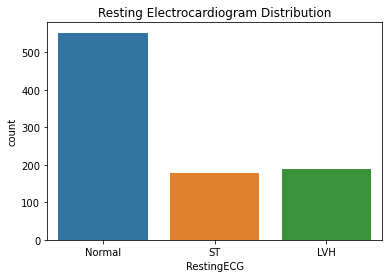

In [21]:
sns.countplot(x='RestingECG', data=df)
plt.title('Resting Electrocardiogram Distribution')
plt.show()

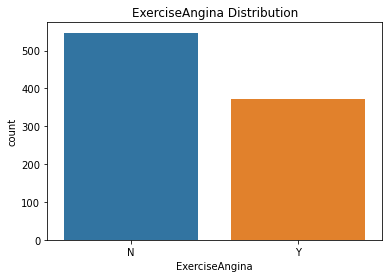

In [22]:
sns.countplot(x='ExerciseAngina', data=df)
plt.title('ExerciseAngina Distribution')
plt.show()

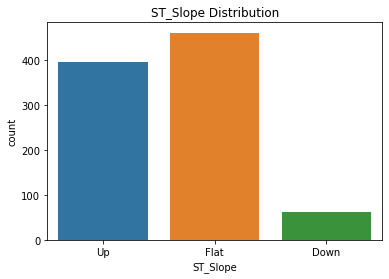

In [23]:
sns.countplot(x='ST_Slope', data=df)
plt.title('ST_Slope Distribution')
plt.show()

ValueError: num must be 1 <= num <= 2, not 3

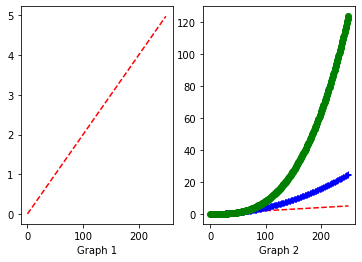

In [49]:
t=np.arange(0, 5, 0.02)
 
plt.subplot(121)
plt.plot(t, "r--")
plt.xlabel("Graph 1")
 
plt.subplot(122)
plt.plot(t, "r--", t**2, "b+", t**3, "g-o")
plt.xlabel("Graph 2")

plt.subplot(123)
plt.plot(t, "r--")
plt.xlabel("Graph 3")
 
plt.subplot(124)
plt.plot(t, "r--", t**2, "b+", t**3, "g-o")
plt.xlabel("Graph 4")

plt.subplot(125)
plt.plot(t, "r--")
plt.xlabel("Graph 5")
  
plt.suptitle("Plotting Multiple Graphs")
plt.show()

# Box Plot
Visualize the distribution of a numerical variable and know the outliers.

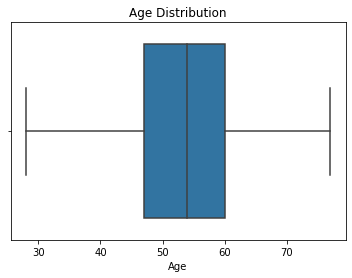

In [50]:
#For the age variable!
sns.boxplot(x='Age', data= df)
plt.title('Age Distribution')
plt.show()

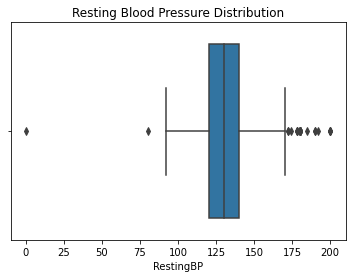

In [51]:
# For the RestingBP variable!
sns.boxplot(x='RestingBP', data= df)
plt.title('Resting Blood Pressure Distribution')
plt.show()

# Histogram
Visualize the distribution of a numerical variable.

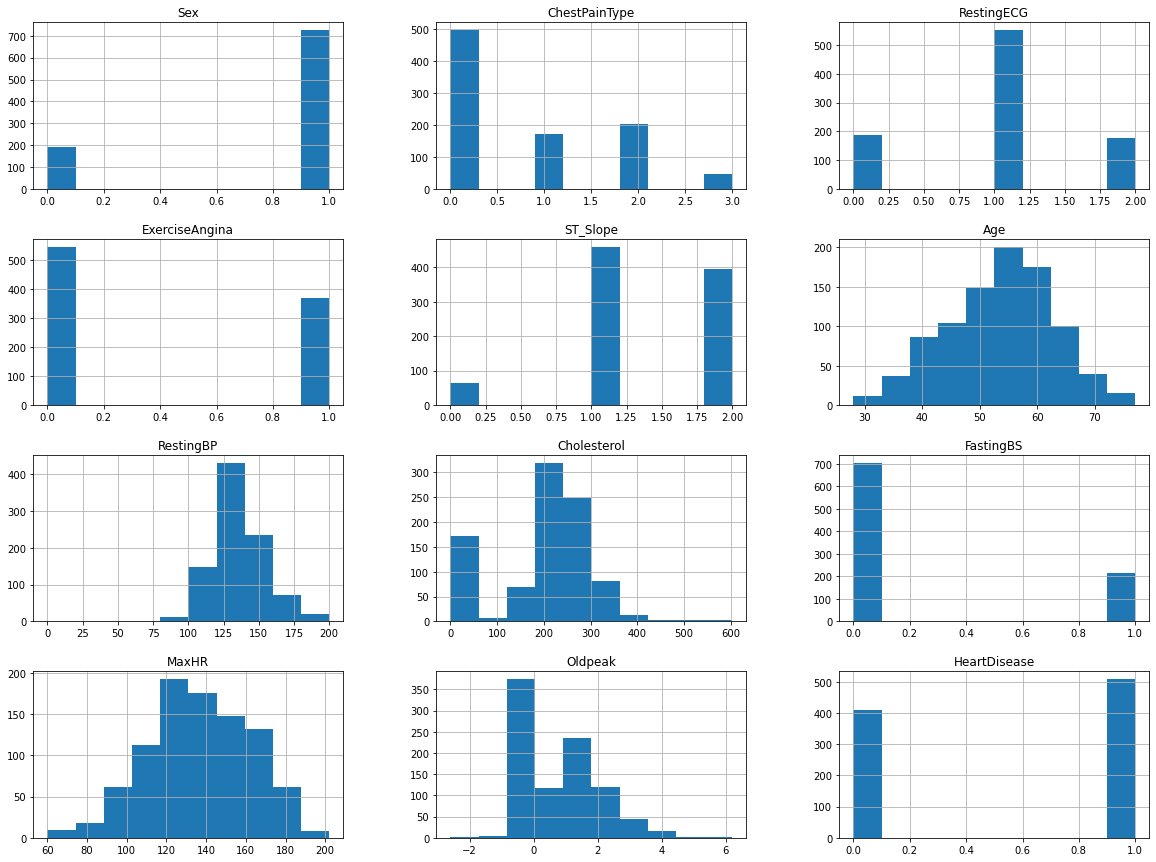

In [54]:
# All features at once
df.hist(figsize=(20,15))
plt.show()

# Convert Data types into Numerical ones

In [62]:
# To convert the data into numerical types
from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
# Selecting objects datatypes from our dataset
obj = df.select_dtypes(include='object')
non_obj = df.select_dtypes(exclude='object')
# Loop to convert each object data type into numerical one
for i in range (0, obj.shape[1]) :
    obj.iloc[:, i] = laben.fit_transform(obj.iloc[:, i])
# concatenation all parts of the data together
df = pd.concat([obj, non_obj], axis = 1)
df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


# Classification Algorithms

## Before Classification
* analysisResults(): helper function fast calculating the results: Accuracy, Sensitivity, Specificity, Positive Predictive Value, Negative Predictive Value, Confusion Matrix
* Generalize the training and test data

In [487]:
# Saving each accuracy value in the array
algorithms=[]
metrics=["accuracies", "sensitivities", "specificities", "PPVs", "NPVs"]
accuracies=[]
sensitivities=[]
specificities=[]
PPVs=[]
NPVs=[]

In [488]:
def analysisResults(X_train, X_test, y_train, y_test, y_pred):
    
    # Proportion of true positive and true negative cases among all cases.
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("Accuracy Value is: ", accuracy)

    # Proportion of true positive cases among all positive cases.
    sensitivity = recall_score(y_test, y_pred)
    sensitivities.append(sensitivity)
    print("Sensitivity Value is: ", sensitivity)

    # Proportion of true negative cases among all negative cases.
    specificity = recall_score(y_test, y_pred, pos_label=0)
    specificities.append(specificity)
    print("Specificity Value is: ", specificity)

    # Proportion of true positive cases among all cases predicted as positive.
    PPV = precision_score(y_test, y_pred)
    PPVs.append(PPV)
    print("Positive Predictive Value is: ", PPV)

    # Proportion of true negative cases among all cases predicted as negative.
    y_test_inv = 1 - y_test
    y_pred_inv = 1 - y_pred
    NPV = precision_score(y_test_inv, y_pred_inv)
    NPVs.append(NPV)
    print("Negative Predictive Value is: ", NPV)

    confusion_Matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix is: ", confusion_Matrix)

In [489]:
# Splitting dataset into training and testing sets
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 1. Naïve Bays Classifier
* Uses Bayes' theorem to make predictions based on the assumption that the features in the data are independent of each other

In [490]:
# important for Naïve Bays Classifier
from sklearn.naive_bayes import GaussianNB
algorithms.append("Naive Bays")

# Training Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Making predictions
y_pred = nb_classifier.predict(x_test)

In [491]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8764044943820225
Sensitivity Value is:  0.8645833333333334
Specificity Value is:  0.8902439024390244
Positive Predictive Value is:  0.9021739130434783
Negative Predictive Value is:  0.8488372093023255
Confusion Matrix is:  [[73  9]
 [13 83]]


# 2. Decision Tree Classifier

In [492]:
# important for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
algorithms.append("Decision Tree")

# Initializing the Decision Tree Classifier
dtc = DecisionTreeClassifier()
# Fitting the model to the training data
dtc.fit(x_train, y_train)
# Making predictions on the testing data
y_pred = dtc.predict(x_test)

In [493]:
# Call the helper function with the local current parameters
analysisResults(x_train, X_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8202247191011236
Sensitivity Value is:  0.8333333333333334
Specificity Value is:  0.8048780487804879
Positive Predictive Value is:  0.8333333333333334
Negative Predictive Value is:  0.8048780487804879
Confusion Matrix is:  [[66 16]
 [16 80]]


# 3. Linear Discriminant Analysis Classifier (LDA)


In [494]:
# important for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
algorithms.append("Linear Discriminant Analysis")

# creating the LDA classifier and fitting the training data
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
# making predictions on the testing data
y_pred = lda.predict(x_test)

In [495]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8764044943820225
Sensitivity Value is:  0.8541666666666666
Specificity Value is:  0.9024390243902439
Positive Predictive Value is:  0.9111111111111111
Negative Predictive Value is:  0.8409090909090909
Confusion Matrix is:  [[74  8]
 [14 82]]


# 4. Logistic Regression

In [496]:
# important for LR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
algorithms.append("Logistic Regression")

# Create a logistic regression model
model = LogisticRegression()
# Train the model
model.fit(x_train, y_train)
# Make predictions
y_pred = model.predict(x_test)

C:\Users\A Moner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [497]:
# Call the helper function with the local current parameters
analysisResults(X_train, X_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8707865168539326
Sensitivity Value is:  0.8541666666666666
Specificity Value is:  0.8902439024390244
Positive Predictive Value is:  0.9010989010989011
Negative Predictive Value is:  0.8390804597701149
Confusion Matrix is:  [[73  9]
 [14 82]]


# 5. SVM Classifier

In [498]:
# important for CSVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
algorithms.append("SVM")

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

classifier=SVC(kernel='linear', random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [499]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8764044943820225
Sensitivity Value is:  0.875
Specificity Value is:  0.8780487804878049
Positive Predictive Value is:  0.8936170212765957
Negative Predictive Value is:  0.8571428571428571
Confusion Matrix is:  [[72 10]
 [12 84]]


# 6. SGD Classifier

In [500]:
# important for SGD
from sklearn.linear_model import SGDClassifier
algorithms.append("SGD")

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

C:\Users\A Moner\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [501]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.797752808988764
Sensitivity Value is:  0.71875
Specificity Value is:  0.8902439024390244
Positive Predictive Value is:  0.8846153846153846
Negative Predictive Value is:  0.73
Confusion Matrix is:  [[73  9]
 [27 69]]


# 7. K-Nearest Neighbors

In [502]:
# important for KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
algorithms.append("K-Nearest Neighbors")

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [503]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8651685393258427
Sensitivity Value is:  0.8645833333333334
Specificity Value is:  0.8658536585365854
Positive Predictive Value is:  0.8829787234042553
Negative Predictive Value is:  0.8452380952380952
Confusion Matrix is:  [[71 11]
 [13 83]]


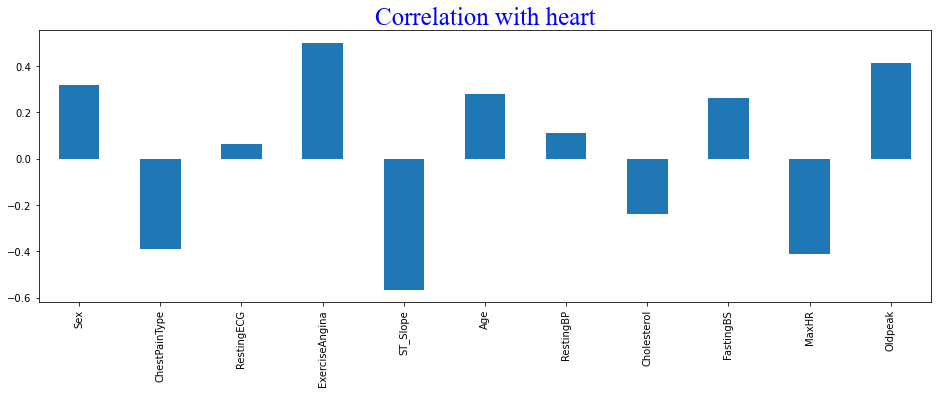

In [504]:
# Correlation of each parameter in corresponding with such a disease
x.corrwith(y).plot.bar(figsize=(16, 5), rot=90, grid=False)
plt.title('Correlation with heart',
          fontsize=25,
          color='Blue',
          font='Times New Roman')
plt.show()

# 8. Random Forest Classification

In [505]:
# important for RF
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
algorithms.append("Random Forest")

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [506]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8764044943820225
Sensitivity Value is:  0.8854166666666666
Specificity Value is:  0.8658536585365854
Positive Predictive Value is:  0.8854166666666666
Negative Predictive Value is:  0.8658536585365854
Confusion Matrix is:  [[71 11]
 [11 85]]


# 9. AdaBoost Classifier

In [507]:
# important for RF
from sklearn.ensemble import AdaBoostClassifier
algorithms.append("AdaBoost")

classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [508]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8595505617977528
Sensitivity Value is:  0.8541666666666666
Specificity Value is:  0.8658536585365854
Positive Predictive Value is:  0.8817204301075269
Negative Predictive Value is:  0.8352941176470589
Confusion Matrix is:  [[71 11]
 [14 82]]


# 10. MLP Classifier

In [509]:
from sklearn.neural_network import MLPClassifier
algorithms.append("MLP")

classifier = MLPClassifier(alpha=0.05, max_iter=1000, solver='adam', random_state=0) 
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

C:\Users\A Moner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [510]:
# Call the helper function with the local current parameters
analysisResults(x_train, x_test, y_train, y_test, y_pred)

Accuracy Value is:  0.8426966292134831
Sensitivity Value is:  0.8125
Specificity Value is:  0.8780487804878049
Positive Predictive Value is:  0.8863636363636364
Negative Predictive Value is:  0.8
Confusion Matrix is:  [[72 10]
 [18 78]]


# 11. Linear Regression!

In [511]:
# from sklearn.linear_model import LinearRegression
# #algorithms.append("Linear Regression")

# reg = LinearRegression()
# reg.fit(X_train,y_train)

In [512]:
# y_pred = reg.predict(x_test)
# print("Regression Score value: ", reg.score(x_train,y_train))
# print("Regression intercept value: ", reg.intercept_)
# print("Regression coefficient value: ", reg.coef_)

2. subplots
* bar plots noran
4. Collect graph
* all

# Conclusion

In [513]:
for a in range(len(accuracies)):
    print("Algorithm Num." + str(a) + " <" + algorithms[a] + ">: ")
    print("Accuracy: " , accuracies[a])
    print("Sensitivity: " , sensitivities[a])
    print("Specificity: " , specificities[a])
    print("Positive Predictive Value: " , PPVs[a])
    print("Negative Predictive Value: " , NPVs[a])

Algorithm Num.0 <Naive Bays>: 
Accuracy:  0.8764044943820225
Sensitivity:  0.8645833333333334
Specificity:  0.8902439024390244
Positive Predictive Value:  0.9021739130434783
Negative Predictive Value:  0.8488372093023255
Algorithm Num.1 <Decision Tree>: 
Accuracy:  0.8202247191011236
Sensitivity:  0.8333333333333334
Specificity:  0.8048780487804879
Positive Predictive Value:  0.8333333333333334
Negative Predictive Value:  0.8048780487804879
Algorithm Num.2 <Linear Discriminant Analysis>: 
Accuracy:  0.8764044943820225
Sensitivity:  0.8541666666666666
Specificity:  0.9024390243902439
Positive Predictive Value:  0.9111111111111111
Negative Predictive Value:  0.8409090909090909
Algorithm Num.3 <Logistic Regression>: 
Accuracy:  0.8707865168539326
Sensitivity:  0.8541666666666666
Specificity:  0.8902439024390244
Positive Predictive Value:  0.9010989010989011
Negative Predictive Value:  0.8390804597701149
Algorithm Num.4 <SVM>: 
Accuracy:  0.8764044943820225
Sensitivity:  0.875
Specificity:

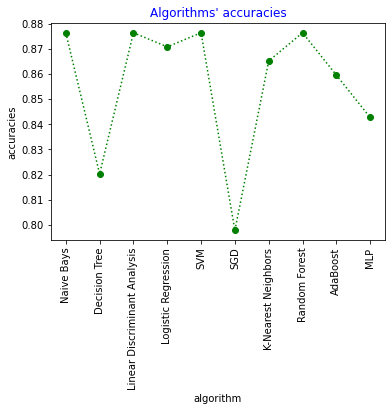

In [554]:
plt.title("Algorithms' accuracies" , color="blue")
plt.xlabel("algorithm")
plt.ylabel("accuracies")
#plt.ylim(min(accuracies), max(accuracies), 0.05)

plt.plot(algorithms, accuracies, color ="green", marker='o', linestyle='dotted')
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

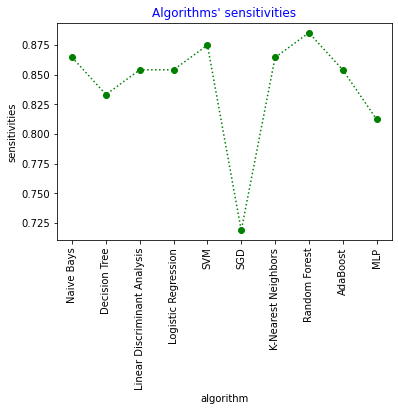

In [555]:
plt.title("Algorithms' sensitivities" , color="blue")
plt.xlabel("algorithm")
plt.ylabel("sensitivities")
#plt.ylim(min(accuracies), max(accuracies), 0.05)

plt.plot(algorithms, sensitivities, color ="green", marker='o', linestyle='dotted')
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

In [523]:
for a in metrics:
    print(a)

accuracies
sensitivities
specificities
PPVs
NPVs


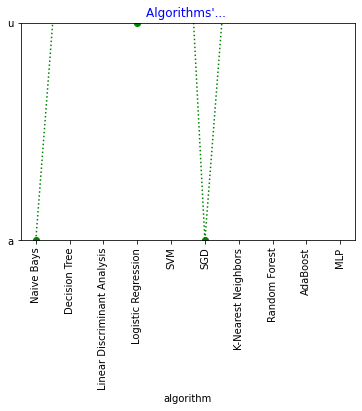

ValueError: x and y must have same first dimension, but have shapes (10,) and (13,)

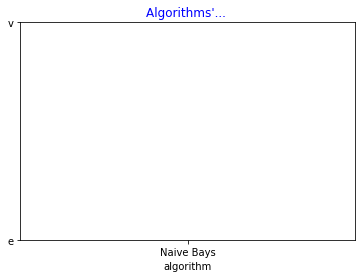

In [556]:
for i in metrics:
    plt.title("Algorithms'... ", color="blue")
    plt.xlabel("algorithm")

    plt.ylim(min(i), max(i), 0.05)
    plt.plot(algorithms, list(i), color ="green", marker='o', linestyle='dotted')
    plt.tick_params(axis='x', labelrotation = 90)
    plt.show()